In [5]:
!pip install networkx
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import random
from collections import Counter

In [6]:
def convert_prufer_to_tree(a):
    """
    Convierte una sucesión de Prüfer 'a' en un árbol.

    Parámetros:
      - a: lista de enteros que representa la sucesión de Prüfer.
           Se asume que los números en 'a' están en el rango 1..n+2,
           donde n = len(a).

    Retorna:
      - edges: lista de tuplas (u, v) representando las aristas del árbol.
    """
    n = len(a)               # La longitud de la sucesión de Prüfer
    N = n + 2                # El número total de nodos del árbol
    # Crear una lista para almacenar los grados de cada nodo.
    # Usamos un arreglo de tamaño N+1 para usar índices del 1 al N.
    degree = [0] * (N + 1)

    # Inicialmente, cada nodo tiene grado 1
    for i in range(1, N + 1):
        degree[i] = 1

    # Por cada elemento de la sucesión de Prüfer, se incrementa el grado del nodo correspondiente
    for val in a:
        degree[val] += 1

    edges = []  # Aquí se almacenarán las aristas del árbol

    # Para cada valor 'val' en la sucesión de Prüfer:
    for val in a:
        # Se busca el primer nodo (de menor índice) con grado 1
        for j in range(1, N + 1):
            if degree[j] == 1:
                # Se inserta la arista entre 'val' y 'j'
                edges.append((val, j))
                # Se actualizan los grados de ambos nodos
                degree[val] -= 1
                degree[j] -= 1
                # Se rompe el bucle ya que se encontró la hoja a conectar
                break

    # Al final, quedarán exactamente dos nodos con grado 1.
    # Se deben conectar estos dos nodos.
    u = v = 0
    for i in range(1, N + 1):
        if degree[i] == 1:
            if u == 0:
                u = i
            else:
                v = i
                break
    edges.append((u, v))
    degree[u] -= 1
    degree[v] -= 1

    return edges



In [7]:
def produce_prufer(n, seed=None):
    """
    Produce una sucesión de Prufer para un árbol con n vértices, de forma que
    cada vértice aparece 0, 1 o 2 veces (asi que los grados son 1, 2 o 3).

    Parámetros:
      - n: orden del árbol.
      - seed: semilla para el generador de números aleatorios (opcional).

    Retorna:
      - Una lista que representa la sucesión de Prufer (de longitud n-2).
    """
    if seed is not None:
        random.seed(seed)

    total = n - 2  # Total de apariciones a distribuir
    frequencies = [0] * (n + 1)  # Usamos índices 1..n (índice 0 no se utiliza)

    # Distribuir las apariciones f(i) para cada vértice i
    for i in range(1, n+1):
        remaining = n - i  # vértices restantes después de i
        min_possible = max(0, total - 2 * remaining)
        max_possible = min(2, total)
        # Se elige un valor en el rango [min_possible, max_possible]
        freq = random.randint(min_possible, max_possible)
        frequencies[i] = freq
        total -= freq

    # Al final, total debe ser 0
    if total != 0:
        raise ValueError("Error en la distribución: total != 0")

    # Construir la lista de la sucesión de Prufer
    prufer_seq = []
    for i in range(1, n+1):
        prufer_seq.extend([i] * frequencies[i])

    # Opcional: barajar la sucesión para variar el orden
    random.shuffle(prufer_seq)
    return prufer_seq



In [8]:
n = 200  # Número de nodos del árbol
prufer_seq = produce_prufer(n, seed=10)
print("Sucesión de Prufer generada:", prufer_seq)

    # Validar la cantidad de apariciones (y por ende, los grados)

Sucesión de Prufer generada: [93, 11, 189, 139, 181, 75, 9, 70, 19, 24, 60, 96, 174, 1, 66, 34, 167, 114, 151, 63, 172, 49, 15, 22, 35, 29, 150, 97, 41, 102, 177, 146, 44, 91, 109, 90, 179, 63, 38, 72, 199, 57, 14, 41, 54, 159, 173, 114, 51, 60, 104, 71, 61, 195, 130, 93, 5, 169, 175, 35, 36, 62, 108, 4, 182, 50, 19, 193, 111, 131, 192, 194, 5, 96, 81, 122, 140, 100, 73, 147, 148, 50, 29, 121, 128, 127, 61, 199, 133, 189, 134, 145, 154, 31, 8, 79, 14, 148, 136, 33, 27, 144, 197, 54, 188, 55, 105, 11, 126, 94, 198, 153, 3, 42, 123, 141, 160, 85, 10, 156, 163, 176, 88, 186, 200, 115, 160, 149, 180, 25, 145, 197, 184, 135, 78, 193, 97, 128, 117, 73, 198, 140, 142, 81, 133, 79, 192, 171, 131, 196, 72, 194, 16, 26, 178, 20, 56, 110, 118, 173, 184, 182, 1, 178, 176, 33, 105, 196, 75, 191, 153, 183, 130, 124, 146, 132, 89, 186, 28, 58, 124, 195, 167, 24, 53, 101, 55, 115, 200, 104, 40, 135, 183, 44, 80, 30, 151, 168]


In [9]:
tree_edges = convert_prufer_to_tree(prufer_seq)

print(tree_edges)


[(93, 2), (11, 6), (189, 7), (139, 12), (181, 13), (75, 17), (9, 18), (70, 9), (19, 21), (24, 23), (60, 32), (96, 37), (174, 39), (1, 43), (66, 45), (34, 46), (167, 34), (114, 47), (151, 48), (63, 52), (172, 59), (49, 64), (15, 49), (22, 15), (35, 22), (29, 65), (150, 66), (97, 67), (41, 68), (102, 69), (177, 70), (146, 74), (44, 76), (91, 77), (109, 82), (90, 83), (179, 84), (63, 86), (38, 63), (72, 38), (199, 87), (57, 90), (14, 57), (41, 91), (54, 41), (159, 92), (173, 95), (114, 98), (51, 99), (60, 51), (104, 60), (71, 102), (61, 71), (195, 103), (130, 106), (93, 107), (5, 93), (169, 109), (175, 112), (35, 113), (36, 35), (62, 36), (108, 62), (4, 108), (182, 4), (50, 114), (19, 116), (193, 19), (111, 119), (131, 111), (192, 120), (194, 125), (5, 129), (96, 5), (81, 96), (122, 137), (140, 122), (100, 138), (73, 100), (147, 139), (148, 143), (50, 147), (29, 50), (121, 29), (128, 121), (127, 150), (61, 127), (199, 61), (133, 152), (189, 155), (134, 157), (145, 134), (154, 158), (31, 1

In [10]:
def build_graph(edges):
    """
    Construye y visualiza un grafo a partir de una lista de aristas.

    Parámetros:
      - edges: lista de tuplas (u, v) que representan las aristas del grafo.

    Retorna:
      - G: objeto grafo (networkx.Graph) construido.
    """
    # Crear un grafo vacío
    G = nx.Graph()

    # Agregar todas las aristas al grafo
    G.add_edges_from(tree_edges)

    # Calcular posiciones para los nodos (usamos el layout de resorte)
    pos = nx.spring_layout(G)

    # Configurar y mostrar la visualización
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color="lightblue",
            edge_color="gray", node_size=500, font_size=12)
    plt.title("Gráfica a partir de la sucesión de Prüfer")
    plt.axis("off")
    plt.show()

    return G

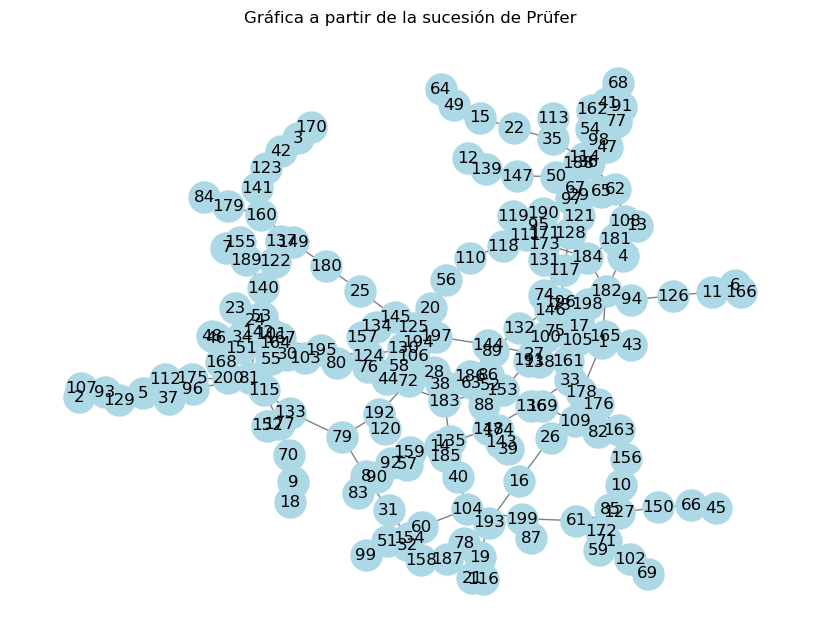

In [11]:
G = build_graph(tree_edges)

In [12]:
def prufer_sequence_from_tree(edges):
    """
    Obtiene la sucesión de Prüfer de un árbol dado.

    Parámetros:
      - edges: lista de tuplas (u, v) que representan las aristas de un árbol etiquetado.

    Retorna:
      - prufer_seq: lista que representa la sucesión de Prüfer del árbol.
    """
    # 1. Determinar el conjunto de nodos y el número total de vértices.
    nodes = set()
    for u, v in edges:
        nodes.add(u)
        nodes.add(v)
    n = len(nodes)

    # 2. Crear la lista de adyacencia y calcular el grado de cada nodo.
    adj = {node: [] for node in nodes}
    degree = {node: 0 for node in nodes}

    for u, v in edges:
        adj[u].append(v)
        adj[v].append(u)
        degree[u] += 1
        degree[v] += 1

    # 3. Inicializar un heap (min-heap) con todas las hojas (nodos con grado 1)
    heap = []
    for node in nodes:
        if degree[node] == 1:
            heapq.heappush(heap, node)

    prufer_seq = []

    # 4. Realizar n-2 iteraciones para construir la sucesión de Prüfer.
    for _ in range(n - 2):
        # a) Extraer la hoja de menor etiqueta.
        leaf = heapq.heappop(heap)

        # b) Su hoja tendrá un único vecino; se toma el primer (y único) de su lista de adyacencia.
        neighbor = adj[leaf][0]
        prufer_seq.append(neighbor)

        # c) Actualizar el grado del vecino, eliminando la conexión con la hoja.
        degree[neighbor] -= 1
        adj[neighbor].remove(leaf)

        # d) La hoja se elimina del árbol; (podríamos marcarla con grado 0).
        degree[leaf] = 0

        # e) Si el vecino ahora es una hoja (grado 1), se agrega al heap.
        if degree[neighbor] == 1:
            heapq.heappush(heap, neighbor)

    return prufer_seq

In [13]:
prufer = prufer_sequence_from_tree(tree_edges)
print("La sucesión de Prüfer es:", prufer)

La sucesión de Prüfer es: [93, 11, 189, 139, 181, 75, 9, 70, 19, 24, 60, 96, 174, 1, 66, 34, 167, 114, 151, 63, 172, 49, 15, 22, 35, 29, 150, 97, 41, 102, 177, 146, 44, 91, 109, 90, 179, 63, 38, 72, 199, 57, 14, 41, 54, 159, 173, 114, 51, 60, 104, 71, 61, 195, 130, 93, 5, 169, 175, 35, 36, 62, 108, 4, 182, 50, 19, 193, 111, 131, 192, 194, 5, 96, 81, 122, 140, 100, 73, 147, 148, 50, 29, 121, 128, 127, 61, 199, 133, 189, 134, 145, 154, 31, 8, 79, 14, 148, 136, 33, 27, 144, 197, 54, 188, 55, 105, 11, 126, 94, 198, 153, 3, 42, 123, 141, 160, 85, 10, 156, 163, 176, 88, 186, 200, 115, 160, 149, 180, 25, 145, 197, 184, 135, 78, 193, 97, 128, 117, 73, 198, 140, 142, 81, 133, 79, 192, 171, 131, 196, 72, 194, 16, 26, 178, 20, 56, 110, 118, 173, 184, 182, 1, 178, 176, 33, 105, 196, 75, 191, 153, 183, 130, 124, 146, 132, 89, 186, 28, 58, 124, 195, 167, 24, 53, 101, 55, 115, 200, 104, 40, 135, 183, 44, 80, 30, 151, 168]


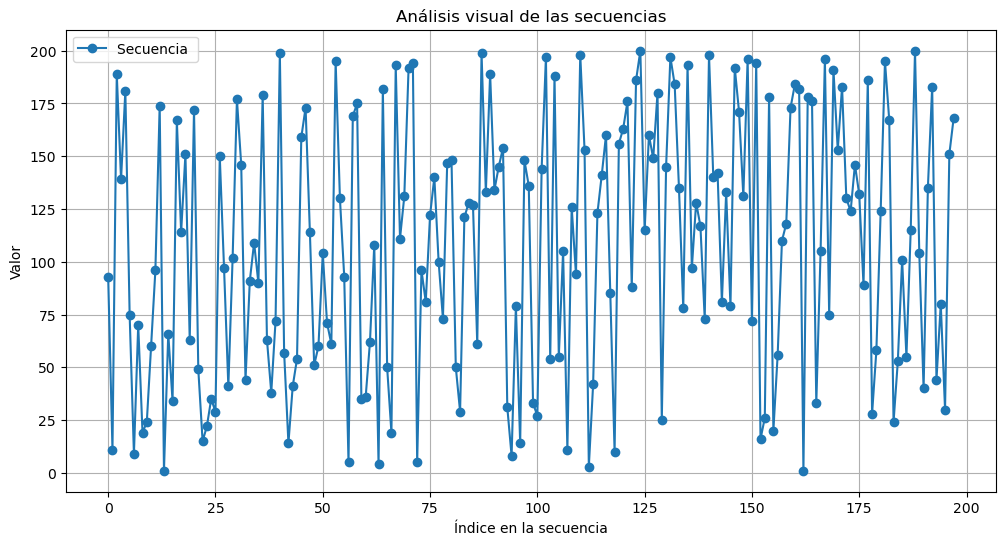

In [14]:
# Visualizar la evolución de las secuencias
plt.figure(figsize=(12, 6))

plt.plot(prufer, label=f"Secuencia ", marker="o", linestyle="-")

plt.xlabel("Índice en la secuencia")
plt.ylabel("Valor")
plt.title("Análisis visual de las secuencias")
plt.legend()
plt.grid()
plt.show()

In [15]:
nx.diameter(G)

56

In [16]:
def graficar_distribucion_grados(G):
    """
    Grafica la distribución de grados del grafo G.

    Parámetros:
        G (nx.Graph): El grafo de networkx.
    """
    # Obtener la lista de grados de cada nodo (directamente de G)
    grados = [grado for nodo, grado in G.degree()]

    # Contar la frecuencia de cada grado
    distribucion = Counter(grados)

    # Ordenar los grados y sus frecuencias para graficar
    grados_ordenados = sorted(distribucion.keys())
    frecuencias = [distribucion[g] for g in grados_ordenados]

    # Configurar el gráfico
    plt.figure(figsize=(8, 6))
    plt.bar(grados_ordenados, frecuencias, color='skyblue')
    plt.title("Distribución de grados")
    plt.xlabel("Grado")
    plt.ylabel("Orden")
    plt.xticks(grados_ordenados)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Mostrar el gráfico
    plt.show()

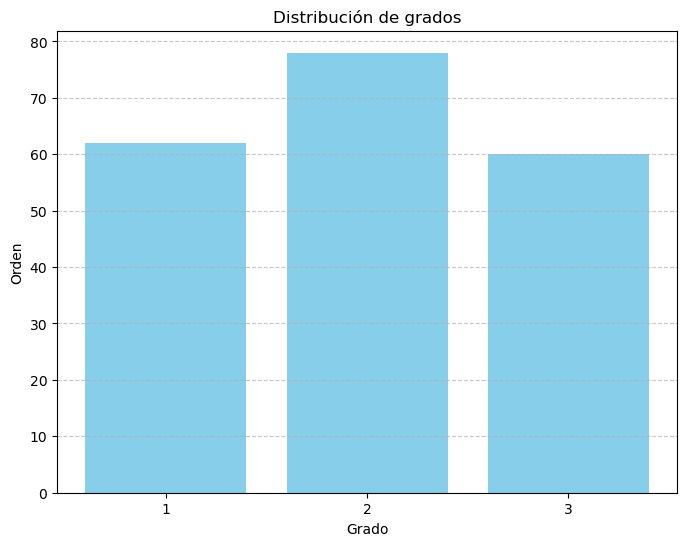

In [17]:
graficar_distribucion_grados(G)

In [18]:
import warnings
import networkit as nk
warnings.filterwarnings('ignore')

In [19]:
T = nk.nxadapter.nx2nk(G)

In [20]:
nk.profiling.Profile.create(T).show()

Network Structural Profile 
 
	<!--- HELP --->
 Navigating the profile 
 
 the profile includes the following sections by default: 
 
 global properties 
 overview of node centrality and partition distributions 
 detail views of node centrality distributions 
 node centrality correlations 
 detail views of partitions 
 
 click [+] for descriptions of measures 
 click on distribution thumbnail for detail view 
 hover over variable name of statistical figures for explanation 
 click on distribution plot for larger view 
 
 
	<!--- END HELP --->
 
 200 
 199 
 0.01 
 False 
 False 
 0 
 (56, 56) 
 N/A 
 1 
 
 
 
 <img src="data:image/svg+xml;utf8,%3Csvg%20xmlns%3Axlink%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxlink%22%20width%3D%22288pt%22%20height%3D%22180pt%22%20viewBox%3D%220%200%20288%20180%22%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F2000%2Fsvg%22%20version%3D%221.1%22%3E%20%3Cmetadata%3E%20%3Crdf%3ARDF%20xmlns%3Adc%3D%22http%3A%2F%2Fpurl.org%2Fdc%2Felements%2F1.1%2F%22%20xmlns%3Acc%3D%22http%3A%2F%2Fcreativecommons.org%2Fns%23%22%20xmlns%3Ardf%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2F02%2F22-rdf-syntax-ns%23%22%3E%20%3Ccc%3AWork%3E%20%3Cdc%3Atype%20rdf%3Aresource%3D%22http%3A%2F%2Fpurl.org%2Fdc%2Fdcmitype%2FStillImage%22%2F%3E%20%3Cdc%3Adate%3E2025-06-22T20%3A11%3A57.799320%3C%2Fdc%3Adate%3E%20%3Cdc%3Aformat%3Eimage%2Fsvg%2Bxml%3C%2Fdc%3Aformat%3E%20%3Cdc%3Acreator%3E%20%3Ccc%3AAgent%3E%20%3Cdc%3Atitle%3EMatplotlib%20v3.8.0%2C%20https%3A%2F%2Fmatplotlib.org%2F%3C%2Fdc%3Atitle%3E%20%3C%2Fcc%3AAgent%3E%20%3C%2Fdc%3Acreator%3E%20%3C%2Fcc%3AWork%3E%20%3C%2Frdf%3ARDF%3E%20%3C%2Fmetadata%3E%20%3Cdefs%3E%20%3Cstyle%20type%3D%22text%2Fcss%22%3E%2A%7Bstroke-linejoin%3A%20round%3B%20stroke-linecap%3A%20butt%7D%3C%2Fstyle%3E%20%3C%2Fdefs%3E%20%3Cg%20id%3D%22figure_1%22%3E%20%3Cg%20id%3D%22patch_1%22%3E%20%3Cpath%20d%3D%22M%200%20180%20L%20288%20180%20L%20288%200%20L%200%200%20z%20%22%20style%3D%22fill%3A%20%23ffffff%22%2F%3E%20%3C%2Fg%3E%20%3Cg%20id%3D%22axes_1%22%3E%20%3Cg%20id%3D%22patch_2%22%3E%20%3Cpath%20d%3D%22M%2030.58%20138.04%20L%20263.12%20138.04%20L%20263.12%2012.846391%20L%2030.58%2012.846391%20z%20%22%20style%3D%22fill%3A%20%23ffffff%22%2F%3E%20%3C%2Fg%3E%20%3Cg%20id%3D%22patch_3%22%3E%20%3Cpath%20d%3D%22M%2039.192593%20138.04%20L%2054.572222%20138.04%20L%2054.572222%2042.354549%20L%2039.192593%2042.354549%20z%20%22%20clip-path%3D%22url%28%23p1bd9345db9%29%22%20style%3D%22fill%3A%20%2301796f%3B%20fill-opacity%3A%200.2%3B%20stroke%3A%20%2301796f%3B%20stroke-opacity%3A%200.6%3B%20stroke-linejoin%3A%20miter%22%2F%3E%20%3C%2Fg%3E%20%3Cg%20id%3D%22patch_4%22%3E%20%3Cpath%20d%3D%22M%2054.572222%20138.04%20L%2069.951852%20138.04%20L%2069.951852%20138.04%20L%2054.572222%20138.04%20z%20%22%20clip-path%3D%22url%28%23p1bd9345db9%29%22%20style%3D%22fill%3A%20%2301796f%3B%20fill-opacity%3A%200.2%3B%20stroke%3A%20%2301796f%3B%20stroke-opacity%3A%200.6%3B%20stroke-linejoin%3A%20miter%22%2F%3E%20%3C%2Fg%3E%20%3Cg%20id%3D%22patch_5%22%3E%20%3Cpath%20d%3D%22M%2069.951852%20138.04%20L%2085.331481%20138.04%20L%2085.331481%20138.04%20L%2069.951852%20138.04%20z%20%22%20clip-path%3D%22url%28%23p1bd9345db9%29%22%20style%3D%22fill%3A%20%2301796f%3B%20fill-opacity%3A%200.2%3B%20stroke%3A%20%2301796f%3B%20stroke-opacity%3A%200.6%3B%20stroke-linejoin%3A%20miter%22%2F%3E%20%3C%2Fg%3E%20%3Cg%20id%3D%22patch_6%22%3E%20%3Cpath%20d%3D%22M%2085.331481%20138.04%20L%20100.711111%20138.04%20L%20100.711111%20138.04%20L%2085.331481%20138.04%20z%20%22%20clip-path%3D%22url%28%23p1bd9345db9%29%22%20style%3D%22fill%3A%20%2301796f%3B%20fill-opacity%3A%200.2%3B%20stroke%3A%20%2301796f%3B%20stroke-opacity%3A%200.6%3B%20stroke-linejoin%3A%20miter%22%2F%3E%20%3C%2Fg%3E%20%3Cg%20id%3D%22patch_7%22%3E%20%3Cpath%20d%3D%22M%20100.711111%20138.04%20L%20116.090741%20138.04%20L%20116.090741%20138.04%20L%20100.711111%20138.04%20z%20%22%20clip-path%3D%22url%28%23p1bd9345db9%29%22%20style%3D%22fill%3A%20%2301796f%3B%20fill-opacity%3A%200.2%3B%20stroke%3A%20%2301796f%3B%20stroke-opacity%3

In [35]:
#nk.profiling.Profile.create(T).output(directory="data",outputType="LaTeX",filename="profile.")